In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Seaborn_Task/HRDataset.csv')
df['count']=1
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,count
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,1
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,1
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,1
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,1
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,1


In [5]:

df.dropna(thresh=2,inplace=True)
df.isnull()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

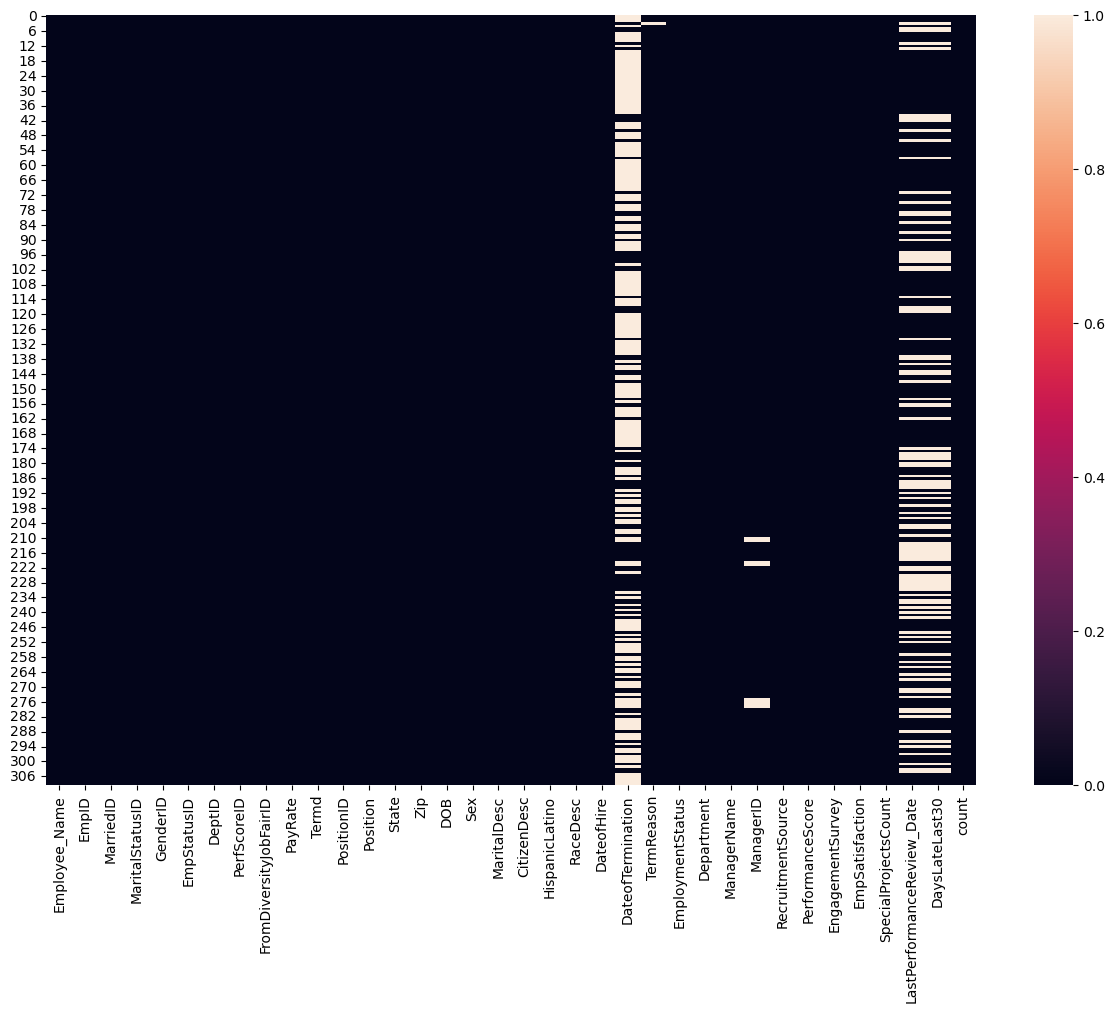

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

# Najpierw przyglądam się danym dot. wydajności pracy i przełożonych:

### Zmieniam performance score na oceny (liczby):

In [13]:
df3=df.replace({'PerformanceScore': {'Exceeds':3 ,'Fully Meets':2,'Needs Improvement':1,'PIP':0}})

In [15]:
df2=df3.pivot_table(values='count',index=['PerformanceScore'],aggfunc=np.sum)
df2

,count
PerformanceScore,
0,12
1,18
2,243
3,37


C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\553075996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['PerformanceScore'])


<Axes: xlabel='PerformanceScore', ylabel='Density'>

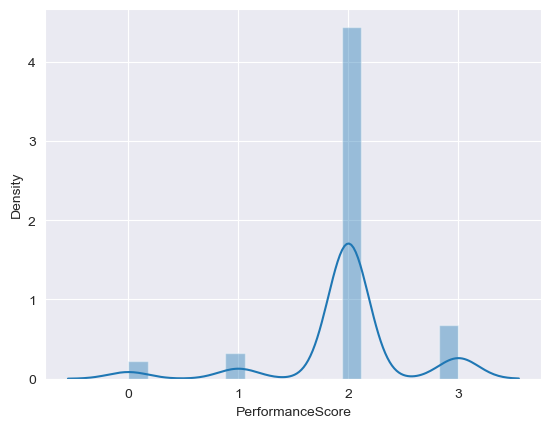

In [17]:
sns.set_style('darkgrid')
sns.distplot(df3['PerformanceScore'])

# Ilość pracowników pod każdym przełożonym:

In [20]:
df2=df.pivot_table(values='count',index=['ManagerName'],aggfunc=np.sum)
df2

,count
ManagerName,
Alex Sweetwater,9
Amy Dunn,21
Board of Directors,2
Brandon R. LeBlanc,7
Brannon Miller,21
Brian Champaigne,8
David Stanley,21
Debra Houlihan,3
Elijiah Gray,22


# Średnia wydajności pracowników w zależności od przełożonego:

In [23]:
df4=df3.pivot_table(values='PerformanceScore',index=['ManagerName'],aggfunc=np.mean)
df4

,PerformanceScore
ManagerName,
Alex Sweetwater,2.111111
Amy Dunn,1.904762
Board of Directors,2.000000
Brandon R. LeBlanc,2.000000
Brannon Miller,1.904762
Brian Champaigne,2.000000
David Stanley,2.000000
Debra Houlihan,1.666667
Elijiah Gray,2.000000


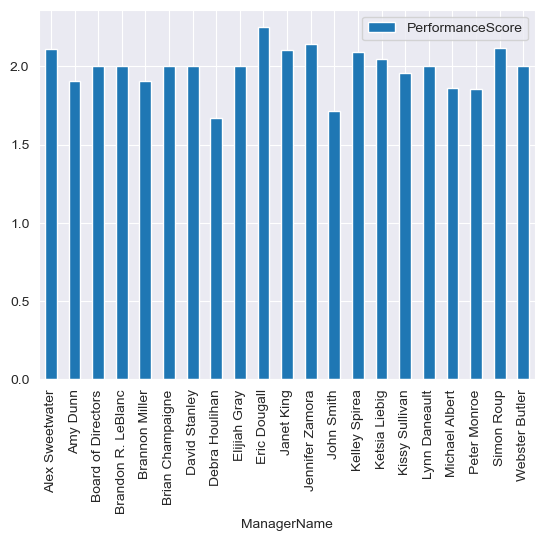

In [25]:
ax=df4.plot(kind='bar', rot=90,width=0.5)

### Jak widać na wykresie nie istnieje bardzo duża różnica wydajności pracowników w zależności od przełożonego, chociaż niektórzy przełożeni oceniają swoich pracowników gorzej.

# Wyliczam staż pracowników

### Zakładam, że pracownik dalej pracuje, jeśli nie ma informacji "DateofTermination"

In [30]:
df5=df.pivot_table(values='count',index=['DateofTermination'],aggfunc=np.sum)
df5

,count
DateofTermination,
01/02/12,1
01/07/13,1
01/09/12,2
01/11/14,1
01/12/11,1
...,...
11/15/15,1
11/30/12,1
12/12/15,1


# konwertuję daty do formatu datetime:

In [33]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [35]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [37]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df5=df[['Seniority','RecruitmentSource']]
df5

,Seniority,RecruitmentSource
0,10.923288,Diversity Job Fair
1,5.726027,Website Banner Ads
2,4.997260,Internet Search
3,0.158904,Pay Per Click - Google
4,4.410959,Website Banner Ads
...,...,...
305,4.882192,Vendor Referral
306,4.882192,Employee Referral
307,3.243836,On-campus Recruiting
308,4.882192,Employee Referral


In [39]:
df6=df5.pivot_table(values='Seniority',index=['RecruitmentSource'],aggfunc=np.mean)
df6

,Seniority
RecruitmentSource,
Billboard,5.866781
Careerbuilder,8.487671
Company Intranet - Partner,1.216438
Diversity Job Fair,4.495324
Employee Referral,5.029342
Glassdoor,4.157926
Indeed,2.678082
Information Session,5.627397
Internet Search,4.714612


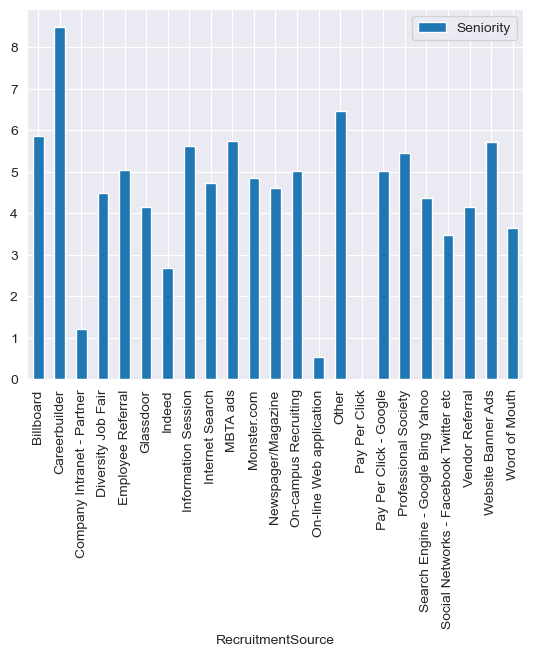

In [41]:
ax=df6.plot(kind='bar', rot=90,width=0.5)

# Najlepszym źródłem pozyskania pracownika jest Careerbuilder

In [44]:
df7=df.pivot_table(values='EmpSatisfaction',index=['MaritalDesc'],aggfunc=np.mean)
df7

,EmpSatisfaction
MaritalDesc,
Divorced,4.033333
Married,3.747967
Separated,3.833333
Single,3.970803
Widowed,4.250000


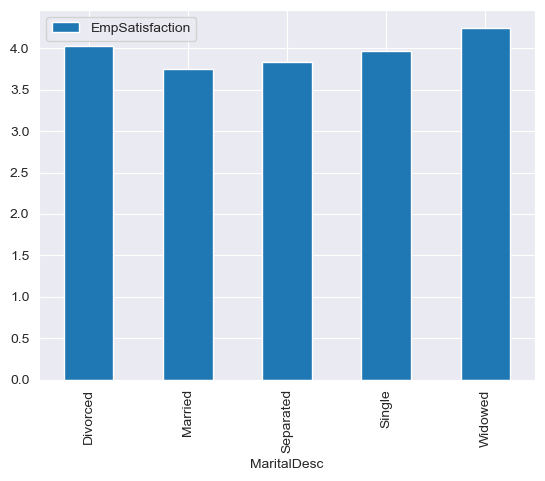

In [46]:
ax=df7.plot(kind='bar', rot=90,width=0.5)

# Średnio najbardziej usatysfakcjonowani z pracy są wdowy i wdowcy

# Tworzę df z obecnie zatrudnionymi pracownikami:

In [73]:
df8=df[['DOB','DateofTermination','SpecialProjectsCount']]
df8['DOB'] = pd.to_datetime(df8['DOB'], format='%Y-%m-%d')
df8

C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\521762437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['DOB'] = pd.to_datetime(df8['DOB'], format='%Y-%m-%d')


,DOB,DateofTermination,SpecialProjectsCount
0,1987-11-24,NaT,6.0
1,1984-04-26,NaT,4.0
2,1986-09-01,NaT,5.0
3,1985-09-16,2015-04-15,4.0
4,1988-05-19,NaT,5.0
...,...,...,...
305,2052-01-18,NaT,8.0
306,1986-04-23,NaT,6.0
307,1983-02-09,NaT,5.0
308,2065-09-09,NaT,4.0


### Niektóre daty są nieprawdziwe, należy usunąć daty urodzenia wcześniejsze niż 2019,9,27

In [75]:
df8['DOB'][1]
df8.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309],
      dtype='int64', length=310)

In [77]:

for n in range(len(df8.index)):
    if df8['DOB'][n] >= dt.datetime(2019,9,27):
        df8['DOB'][n]='NaN'
    else:
        continue

df8

C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\3967523020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['DOB'][n]='NaN'
C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\3967523020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['DOB'][n]='NaN'
C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\3967523020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['DOB'][n]='NaN'
C:\Users\jakubziom\AppData\Loca

,DOB,DateofTermination,SpecialProjectsCount
0,1987-11-24,NaT,6.0
1,1984-04-26,NaT,4.0
2,1986-09-01,NaT,5.0
3,1985-09-16,2015-04-15,4.0
4,1988-05-19,NaT,5.0
...,...,...,...
305,NaT,NaT,8.0
306,1986-04-23,NaT,6.0
307,1983-02-09,NaT,5.0
308,NaT,NaT,4.0


### Lista prawdziwych dat urodzin pracowników zatrudnionych w firmie:

In [79]:
df8.dropna(subset=['DOB'],inplace=True)
df9=df8[df8['DateofTermination'].isnull()]
df9

C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\252565340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.dropna(subset=['DOB'],inplace=True)


,DOB,DateofTermination,SpecialProjectsCount
0,1987-11-24,NaT,6.0
1,1984-04-26,NaT,4.0
2,1986-09-01,NaT,5.0
4,1988-05-19,NaT,5.0
8,1987-05-14,NaT,0.0
...,...,...,...
300,1987-04-04,NaT,3.0
302,1986-06-06,NaT,6.0
306,1986-04-23,NaT,6.0
307,1983-02-09,NaT,5.0


In [81]:
def age(born):
    born=pd.to_datetime(born,format='%Y-%m-%d')
    date=pd.to_datetime("2019-9-27")
    return date.year - born.year - (date.month<born.month and date.day<born.day)

df9['DOB']=df9['DOB'].apply(age)

df10=df9.rename(columns={'DOB':'Age'})
df10

C:\Users\jakubziom\AppData\Local\Temp\ipykernel_4520\3063690296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['DOB']=df9['DOB'].apply(age)


,Age,DateofTermination,SpecialProjectsCount
0,32,NaT,6.0
1,35,NaT,4.0
2,33,NaT,5.0
4,31,NaT,5.0
8,32,NaT,0.0
...,...,...,...
300,32,NaT,3.0
302,33,NaT,6.0
306,33,NaT,6.0
307,36,NaT,5.0


# Struktura wieku pracowników zatrudnionych w firmie

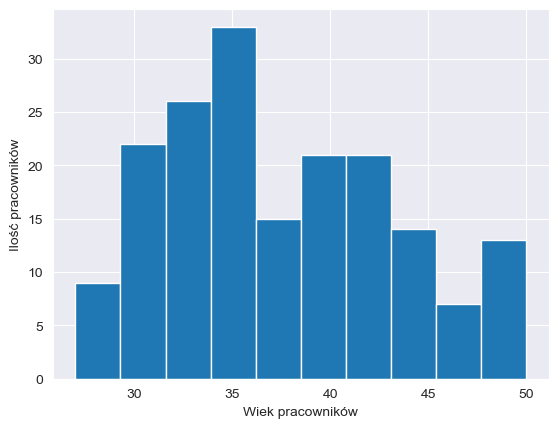

In [83]:
plt.hist(df10['Age'])
plt.xlabel('Wiek pracowników')
plt.ylabel('Ilość pracowników')
plt.show()

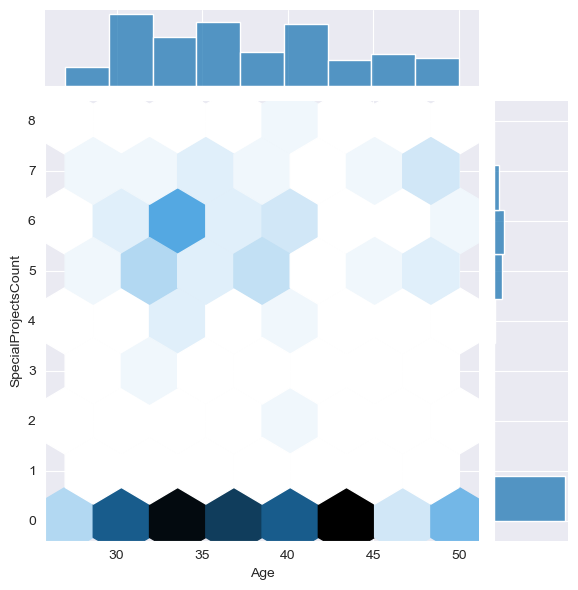

In [91]:

sns.jointplot(x='Age',y='SpecialProjectsCount', data=df10,kind='hex')

## Odp: starsi pracownicy nie pracują nad większą liczbą specjalnych projektów. 
## Większość osób pracuje nad małą ilością specjalnych projektów lub w ogóle. Najwięcej specjalnych
## projektów jest wśród osób w wieku ok 34 lata, ale też procentowo jest to mało w stosutnku do 
## ilości tych osób zatrudnionych w firmie.